In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
pd.options.mode.chained_assignment = None
import json
import sys
import random
sys.path.append('../tdiff_path/')

# import some modules that I created to do some data processing.

import dataset_operations.dataset_operations as do
import retrieve_data.retrieve_data as retrieve

In [2]:
# I have metadata for all the datasets I have available stored in a csv.
site_file_metadata=pd.read_csv('site_file_metadata.csv')

In [3]:
# Let's check out the data we have available!
available_data = site_file_metadata.loc[:,['site','date','data_type', 'interim_data']]# .sort_values(by=['site', 'date'])

print(available_data)

   site      date         data_type  interim_data
0   CLY  20160628     feedline-VSWR          True
1   CLY  20160701     feedline-VSWR         False
2   CLY  20160701  transmitter-path         False
3   CLY  20160701           pm-path         False
4   CLY  20180817     feedline-VSWR          True
5   CLY  20180817     feedline-VSWR         False
6   CLY  20180817  transmitter-path         False
7   CLY  20180817           pm-path          True
8   CLY  20180817           pm-path         False
9   INV  20170811     feedline-VSWR         False
10  INV  20170813  transmitter-path         False
11  INV  20170813           pm-path         False
12  PGR  20171003     feedline-VSWR         False
13  PGR  20170930     feedline-VSWR          True
14  PGR  20170930  transmitter-path         False
15  PGR  20171001           pm-path         False
16  RKN  20160705     feedline-VSWR          True
17  RKN  20160721     feedline-VSWR         False
18  RKN  20160719  transmitter-path         False


In [43]:
# Now we can choose a site, date, and data type that we want to look at, and pass in the index of the data.

%run load_data.py 12

site                                                              PGR
date                                                         20171003
interim_data                                                    False
data_location       /home/shared/Sync/Sites/Prince_George/Trips/20...
mapping_filename    /home/shared/Sync/Sites/Prince_George/Trips/20...
data_type                                               feedline-VSWR
Name: 12, dtype: object

The data has been successfully loaded.


<Figure size 432x288 with 0 Axes>

plotting


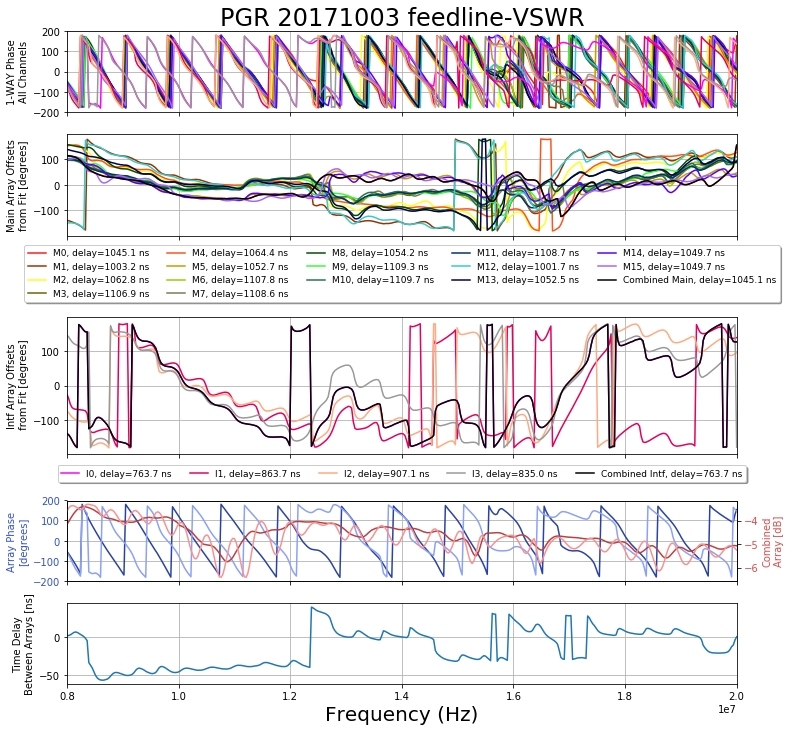

In [44]:
%run def_plot_functions.py
plot_data(working_dataframe, channels, plot_title, colour_dictionary,
                       linear_fit_dict, missing_data, data_description)

In [9]:
# load_data.py has made the following available to us:
# working_dataframe, with all information on all channels from this site, date, and data type
# linear_fit_dict, with information on the phase path for each channel
# cable_loss_dataset_dict, if we chose feedline-VSWR datatype, which is used to calculate a single-direction 
#   path from a VSWR measurement.

# Here is a few lines from the working dataframe
print(working_dataframe.head())
print(list(working_dataframe.columns))

      freq    M0vswr  M0phase_deg    M1vswr  M1phase_deg    M2vswr  \
0  8000000  1.568935   -46.580879  1.648281   -15.810630  1.568224   
1  8060000  1.527980   -60.426704  1.603460   -25.818602  1.535383   
2  8120000  1.488911   -75.292938  1.591219   -36.177273  1.499444   
3  8180000  1.461070   -91.149307  1.626034   -46.512268  1.466338   
4  8240000  1.417566  -107.794510  1.691505   -57.781101  1.424836   

   M2phase_deg    M3vswr  M3phase_deg    M4vswr         ...          \
0   -40.249176  1.556761   -40.419334  1.556941         ...           
1   -54.013847  1.523542   -54.348137  1.542182         ...           
2   -68.624809  1.484050   -69.573700  1.513706         ...           
3   -83.529434  1.451516   -84.775726  1.481565         ...           
4   -98.697281  1.409899  -100.127289  1.436168         ...           

   M_all_phase_deg_unwrap  M_all_phase_rad  M_all_phase_deg  M_all_magnitude  \
0              -46.580879        -0.812990       -46.580879         -2.6

In [6]:
# We can also take a look at what's in the linear_fit_dict:
print(linear_fit_dict.keys())
print(linear_fit_dict[random.choice(list(linear_fit_dict.keys()))].keys())

dict_keys(['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'I0', 'I1', 'I2', 'I3', 'M_all_', 'I_all_'])
dict_keys(['slope', 'intercept', 'rvalue', 'pvalue', 'stderr', 'offset_of_best_fit_rads', 'time_delay_ns', 'best_fit_line_rads'])


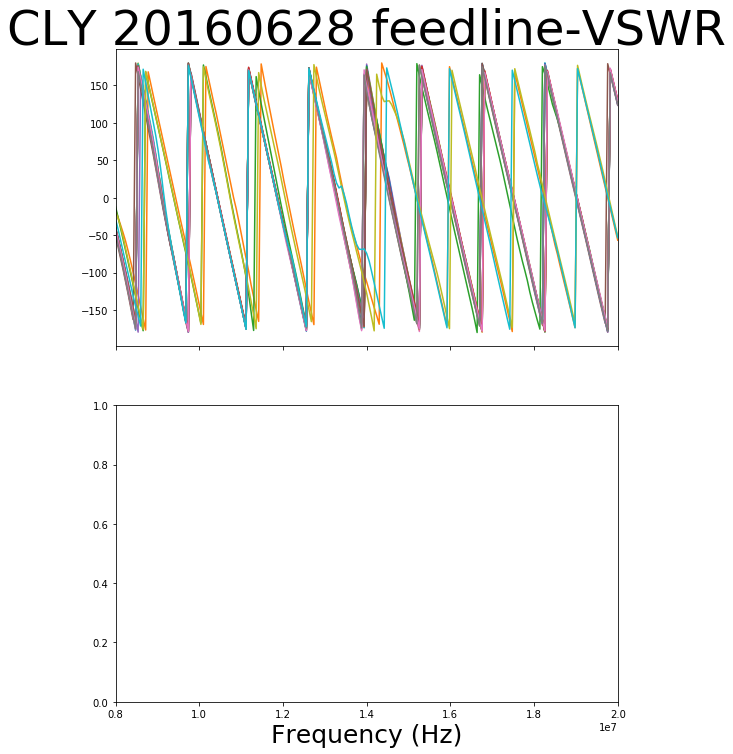

In [7]:
# plot_title = working_site + ' ' + str(working_date) + ' ' + working_data_type

# fig, smpplot = plt.subplots(2, 1, sharex='all', figsize=(9,12))
# xmin, xmax, ymin, ymax = smpplot[0].axis(xmin=8e6, xmax=20e6)
# smpplot[1].set_xlabel('Frequency (Hz)', size=25.0)
# smpplot[0].set_title(plot_title, size=48.0)

# for channel in channels:
#     smpplot[0].plot(working_dataframe['freq'], working_dataframe[channel + 'phase_deg'], label=channel)
    
# plt.show()